In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

class ESAgent:
    def __init__(self,weights = None, bias = None):
        """
            initialize agent with weight and bias

            The agent should carry a MLP network where it has 16 features input and 9 output.

            Hence, MLP has one input layer (16 weights), and input layer fully connects to one output layer (9 weights and 9 bias).

            In order to let ESAgent able to inherite network from its parent. The arguments should have default value for inilizate new population.
        Args:
            weights : weights of network or None
            bias : bias of network or None
        """
        if weights is not None:
            self.weights = weights
        else:
            self.weights = np.random.uniform(-1, 1, (16, 9))

        if bias is not None:
            self.bias = bias
        else:
            self.bias = np.random.uniform(-1, 1, 9)


    def make_a_move(self,board):
        """make a move respect to current board state. You would like to use feature_construct function to convert board state to input features

        Args:
            board: tic tak toe game state

        Returns:
            move (0-8): position of board

        """
        features = feature_construct(board)
        net = np.dot(self.weights.T,features) + self.bias
        output = 1 / (1 + np.exp(-net))
        output[board.flatten() != 0] = -np.inf
        move = np.argmax(output)
        return move
    
# dont change any code after this
class RuleBaseAgent:
    def __init__(self,id,rival_id,p_rnd=0.1):
        self.p_rnd = p_rnd
        self.move = -1
        self.id = id
        self.rival_id = rival_id
    
    def make_a_move(self,board):
        self.find_avaliable_position(board)
        if np.random.random() < self.p_rnd:
            self.random_move()
        elif self.make_win_move(board):
            pass
        elif self.make_block_move(board):
            pass
        elif self.make_two_open_move(board):
            pass
        else: 
            self.random_move()
        self.avaliable_moves = None
        return self.move
        
    def find_avaliable_position(self,board):
        self.avaliable_moves = [i for i in range(9) if board[i//3][i%3] == 0]

    def random_move(self):
        move = np.random.choice(self.avaliable_moves)
        # move = self.avaliable_moves[0]
        self.move = (move//3,move%3)

    def make_win_move(self,board):
        for i,row in enumerate(board):
            if row.sum() == 2 * self.id:
                for j,value in enumerate(row):
                    if value == 0:
                        self.move= (i,j)
                        return True
                    
        
        for j,col in enumerate(board.T):
            if col.sum() == 2 * self.id:
                for i,value in enumerate(col):
                    if value == 0:
                        self.move= (i,j) 
                        return True
                    
        if board.trace() == 2 * self.id:
            for i in range(3):
                if board[i][i] == 0:
                    self.move = (i,i)
                    return True
        
        if np.fliplr(board).trace() == 2 * self.id:
            for i in range(3):
                if board[i][2-i] == 0:
                    self.move = (i,2-i)
                    return True
        
        return False
    
    def make_block_move(self,board):
        for i,row in enumerate(board):
            if row.sum() == 2 * self.rival_id:
                for j,value in enumerate(row):
                    if value == 0:
                        self.move= (i,j)
                        return True
                    
        for j,col in enumerate(board.T):
            if col.sum() == 2 * self.rival_id:
                for i,value in enumerate(col):
                    if value == 0:
                        self.move= (i,j)
                        return True
    
        if board.trace() == 2 * self.rival_id:
            for i in range(3):
                if board[i][i] == 0:
                    self.move = (i,i)
                    return True
        
        if np.fliplr(board).trace() == 2 * self.rival_id:
            for i in range(3):
                if board[i][2-i] == 0:
                    self.move = (i,2-i)
                    return True
        
        return False
    
    def make_two_open_move(self,board):
        p = 0.5
        if board.trace() == self.id:
            for i in range(3):
                if board[i][i] == 0:
                    if p < np.random.random():
                        self.move = (i,i)
                        return True
                    else:
                        p = 1
        
        p = 0.5
        if np.fliplr(board).trace() == self.id:
            for i in range(3):
                if board[i][2-i] == 0:
                    if p < np.random.random():
                        self.move = (i,2-i)
                        return True
                    else:
                        p = 1
        
        p = 0.5
        for i,row in enumerate(board):
            if row.sum() == self.id:
                for j,value in enumerate(row):
                    if value == 0:
                        if p < np.random.random():
                            self.move= (i,j)
                            return True
                        else:
                            p = 1
                    
        
        p = 0.5
        for j,col in enumerate(board.T):
            if col.sum() == self.id:
                for i,value in enumerate(col):
                    if value == 0:
                        if p < np.random.random():
                            self.move= (i,j)
                            return True
                        else:
                            p = 1

        return False
    

In [23]:
import pytest
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

class TestAgent:
    def test_ESAgent_network(self):
        agent = ESAgent()

        assert agent.weights.shape == (16,9)
        assert agent.bias.shape == (9,)

    def test_ESAgent_network(self):
        agent = ESAgent()
        
        board = np.array([[0,1,1],
                          [1,-1,-1],
                          [-1,-1,1]
                          ])
        move = agent.make_a_move(board)
        assert move == 0

        board = np.array([[-1,1,1],
                          [1,0,-1],
                          [-1,-1,1]
                          ])
        move = agent.make_a_move(board)
        assert move == 4
        
        board = np.array([[-1,1,1],
                          [1,-1,-1],
                          [0,-1,1]
                          ])
        move = agent.make_a_move(board)
        assert move == 6

class TestModel:
    def test_model_play(self):
        em = Evolutionary_Model(max_pop=1000,parent_percent=0.2)
        best_agent = em.play_tic_tak_toe(max_epoch=100)

        num_trials = 1000
        wins = 0
        loss = 0
        draw = 0
        currTrial = 0

        for _ in range(num_trials):
            currTrial += 1
            env = TicTakToe(rng=0)
            while not env.terminate:
                action = best_agent.make_a_move(env.board)
                env.step(action)
            if env.winner == Player.PLAYER1:
                wins += 1
            elif env.winner == Player.PLAYER2:
                loss += 1
            else:
                draw += 1
            env.reset()

        print("wins:",wins/num_trials,"loss",loss/num_trials,"draw",draw/num_trials)
        print("Best Agent weight:", best_agent.weights)
        print("Best Agent Bias", best_agent.bias)
        assert True
        

In [24]:

import copy

import numpy as np

    
class TicTakToe():
    """
        tic take tow environment. you dont need to change any code here

    """
        
    def __init__(self,rng):
        """initilize opponent rule base agent

        Args:
            rng (_type_): it the number of chance opponents make random move
        """
        self.player2 = RuleBaseAgent(id=Player.PLAYER2,rival_id=Player.PLAYER1,p_rnd=rng)
        self.reset()

    def reset(self):
        """
            reset game state
        """
        self.board = np.zeros((3,3)).astype('int')
        self.prev_board = copy.deepcopy(self.board)
        self.curr_player = Player.PLAYER1
        self.round = 1
        self.winner = 0
        self.terminate = False

    def step(self,action):
        """environment take a action from player 1 (in this case will be your agent), and it will take this move and call opponent agent also move. 

        Args:
            action      : the position of board

        Returns:
            board       : the board state
            prev_board  : the prev board state (no useful in assignment 2)
            terminate   : if game terminated
            self.winner : winner of game if terminated, Player 1 -> player 1 win, Player 2 -> player 2 win, 0 -> draw
        """
        if self.terminate:
            return self.board,self.prev_board,self.terminate,self.winner

        if not isinstance(action,list) and not isinstance(action, np.ndarray) and not isinstance(action, tuple):
            x,y = (action//3,action%3)
        elif len(action) == 2:
            x,y = action
        else:
            print("invalid input")
            assert RuntimeError
        
        self.move(x,y)
        self.update_round()

        if not self.terminate:
            self.prev_board = copy.deepcopy(self.board)
            action = self.player2.make_a_move(self.board)
            x,y = action
            self.move(x,y)
            self.update_round()

        return self.board,self.prev_board,self.terminate,self.winner
    
    def switch_player(self):
        if self.curr_player == Player.PLAYER1:
            self.curr_player = Player.PLAYER2
        else:
            self.curr_player = Player.PLAYER1

    def move(self,x,y):
        if x < 0 or x > 2 or y < 0 or y > 2:
            print("out of boundary.")
            return False
        elif self.board[x][y] != 0:
            print("occupied.")
            return False
        else:
            self.board[x][y] = self.curr_player
            self.last_move = (x,y)

            return True

    def is_win(self):
        x,y = self.last_move
        rows_check = self.board[x].sum() == 3 * self.curr_player
        cols_check = self.board[:,y].sum() == 3 * self.curr_player

        left_diagonal_check = False
        if x == y:
            left_diagonal_check = np.trace(self.board) == 3 * self.curr_player

        right_diagonal_check = False
        if x + y == 2:
            right_diagonal_check = np.trace(np.fliplr(self.board)) == 3 * self.curr_player

        return rows_check or cols_check or left_diagonal_check or left_diagonal_check or right_diagonal_check
    
    def update_round(self):
        if self.is_win():
            self.winner = self.curr_player
            self.terminate = True
        
        self.round += 1
        if self.round > 9:
            self.terminate = True
        else:
            self.switch_player()

    def show(self):
        """
            print the board state
        """
        print(self.board)
        

In [25]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt 

class Evolutionary_Model:
    def __init__(self,max_pop = 1000, parent_percent = 0.2):
        """initilize evolutionary model and first population

        Args:
            max_pop (int, optional): maximum population at each epoch. Defaults to 1000.
            parent_percent (float, optional): the percentage of parent after selection. Defaults to 0.2.
        
        """
        self.max_pop = max_pop
        self.parent_percent = parent_percent

        self.best_agent = None
        self.best_reward = -1000
        self.population = self.initial_population()
        self.best_rewards_per_epoch = []
        self.avg_rewards_per_epoch = []

    def play_tic_tak_toe(self, max_epoch = 100):
        """play tic tak toe evolutionary and return the best agent you have

        you should follow the persudocode in slides but you allow to some changes as long as it return the best agent you have in the model.

        1. intilize population
        2. do
        3.  fitness         <- evaluation
        3.  parent          <- selection
        4.  new_population  <- evolution
        5. return best_agent

        Returns:
            best_agent (ESagent): _description_
        """

        for epoch in range(max_epoch):
            rewords = []
            for agent in self.population:
                env = TicTakToe(rng=0)
                reword = self.evaluation(env,agent,num_trials=5)
                rewords.append(reword)
                if reword > self.best_reward:
                    self.best_reward = reword
                    self.best_agent = agent
            parent = self.selection(rewords,self.population)
            self.population = self.evolution(parent)


            self.best_rewards_per_epoch.append(np.max(rewords))
            self.avg_rewards_per_epoch.append(np.mean(rewords))
            
        plt.figure(figsize=(10, 5))
        plt.plot(self.best_rewards_per_epoch, label='Best Reward')
        plt.plot(self.avg_rewards_per_epoch, label='Average Reward')
        plt.xlabel('Epoch')
        plt.ylabel('Reward')
        plt.title('Fitness Curve')
        plt.legend()
        plt.show()
        return self.best_agent
    
    def initial_population(self):
        """initilize first population

        Returns:
            population (ESAgent[]): Array of Agents
        """
        return [ESAgent() for _ in range(self.max_pop)]
    
    def evaluation(self,env,agent,num_trials):
        """
            evaluate the reward for each agent. feel free to have your own reward function.
        """
        total_reword = 0
        for _ in range(num_trials):
            for first_move in range(9):
                env.reset()
                env.step(first_move)
                while not env.terminate:
                    action = agent.make_a_move(env.board)
                    env.step(action)
                if env.winner == Player.PLAYER1:
                    total_reword += 1
                elif env.winner == Player.PLAYER2:
                    total_reword -= 2
                else:
                    total_reword += 0
        return total_reword/num_trials

    def selection(self,rewards,population):
        """
            select the best fit in the population. feel free to have your own selection.
            Make sure you select parent according to parent_percent
        """
        rewards = np.array(rewards)
        population = np.array(population)
        sorted_indices = np.argsort(-rewards)
        rewards = rewards[sorted_indices]
        sorted_population = population[sorted_indices]
        parent_size = int(self.parent_percent * len(population))
        return sorted_population[:parent_size]


    def evolution(self,parents):
        """
            evolute new population from parents. 

            be careful about how to reinforce children. You don't want your children perform same as parents and even worser than parents.

            feel free to have your own evolution. In MLP case, you would like to add some noises to weights and bias.
        """
        children = []
        for _ in range(self.max_pop-len(parents)):
            parent = np.random.choice(parents)
            child_weights = parent.weights + np.random.normal(0, 0.1, size=parent.weights.shape)
            child_bias = parent.bias + np.random.normal(0, 0.1, size=parent.bias.shape)
            child = ESAgent(weights=child_weights, bias=child_bias)
            children.append(child)
        return np.concatenate((parents, children))

In [26]:
from enum import IntEnum

class Player(IntEnum):
    PLAYER1 = 1
    PLAYER2 = -1

In [27]:
import numpy as np

def feature_construct(board):
    """convert board state to 16 features

    Args:
        board (_type_): board state

    Returns:
        features: 16 input features
    """
    row = board.sum(axis=0)
    col = board.sum(axis=1)

    a_row = row + 1
    b_row = row - 1
    a_col = col + 1
    b_col = col - 1

    dig = board.trace()
    flip_dig = np.fliplr(board).trace()

    a_dig = dig + 1
    a_flip_dig = flip_dig + 1
    b_dig = dig - 1
    b_flip_dig = flip_dig - 1

    features = np.concatenate([a_row,b_row,a_col,b_col,[a_dig,b_dig,a_flip_dig,b_flip_dig]])
    features = 1/(1 + np.exp(-features))

    return features

Curr epoch:  0
Curr epoch:  1
Curr epoch:  2
Curr epoch:  3
Curr epoch:  4
Curr epoch:  5
Curr epoch:  6
Curr epoch:  7
Curr epoch:  8
Curr epoch:  9
Curr epoch:  10
Curr epoch:  11
Curr epoch:  12
Curr epoch:  13
Curr epoch:  14
Curr epoch:  15
Curr epoch:  16
Curr epoch:  17
Curr epoch:  18
Curr epoch:  19
Curr epoch:  20
Curr epoch:  21
Curr epoch:  22
Curr epoch:  23
Curr epoch:  24
Curr epoch:  25
Curr epoch:  26
Curr epoch:  27
Curr epoch:  28
Curr epoch:  29
Curr epoch:  30
Curr epoch:  31
Curr epoch:  32
Curr epoch:  33
Curr epoch:  34
Curr epoch:  35
Curr epoch:  36
Curr epoch:  37
Curr epoch:  38
Curr epoch:  39
Curr epoch:  40
Curr epoch:  41
Curr epoch:  42
Curr epoch:  43
Curr epoch:  44
Curr epoch:  45
Curr epoch:  46
Curr epoch:  47
Curr epoch:  48
Curr epoch:  49
Curr epoch:  50
Curr epoch:  51
Curr epoch:  52
Curr epoch:  53
Curr epoch:  54
Curr epoch:  55
Curr epoch:  56
Curr epoch:  57
Curr epoch:  58
Curr epoch:  59
Curr epoch:  60
Curr epoch:  61
Curr epoch:  62
Cu

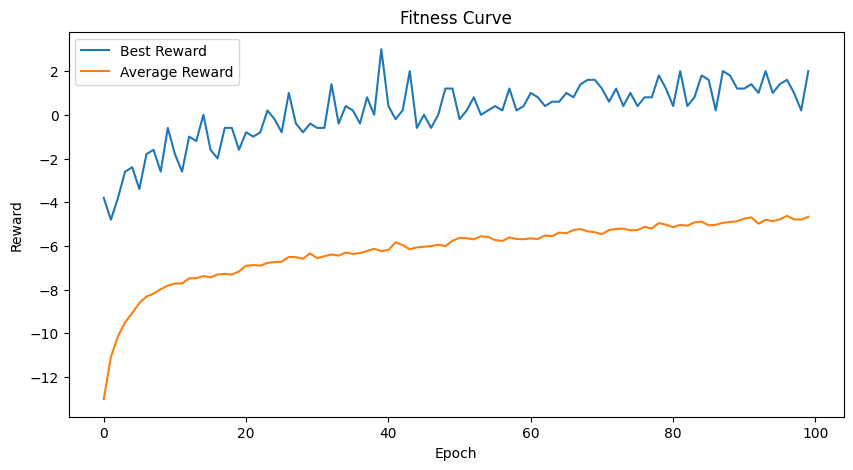

wins: 0.64 loss 0.249 draw 0.111
Best Agent weight: [[-1.41991116e+00  7.20717023e-01  7.07059691e-01 -1.18800374e+00
   1.42946034e+00 -1.27131879e+00  4.02688721e-02  3.97043260e-01
  -6.34371510e-01]
 [ 3.95382091e-01  2.40099940e-01 -9.13613602e-01  7.70608158e-01
  -3.19914194e-01 -1.56712884e-01  7.87814816e-01 -1.45153069e+00
  -4.06405642e-01]
 [ 3.45886022e-01 -3.86987471e-01  1.76631099e+00 -6.56720748e-01
  -1.04991866e+00  1.30521191e-01  1.27274762e+00  5.40242905e-01
   8.32535544e-01]
 [-1.11851321e+00  2.47026959e-01 -5.04023640e-02 -1.34873280e+00
   6.43886933e-01 -1.42081731e-01  4.59709822e-01  3.65622332e-01
   2.85300417e-01]
 [ 6.40620391e-01 -6.83645964e-01  5.87528050e-01  7.07167697e-01
   2.03646892e-01  1.15683635e+00  8.79232438e-02 -1.11262155e-01
  -5.40050820e-01]
 [-8.00369637e-01 -1.48451202e+00  2.13886926e+00  3.52778910e-01
   2.12464568e-01  1.00661148e+00  2.62012452e-01 -5.47871350e-01
  -4.91775978e-01]
 [-6.14734082e-01 -1.38292830e-01  9.81179

In [28]:
#TestAgent.test_ESAgent_network(None)
TestModel.test_model_play(None)

In [31]:
import numpy as np
import csv

# Define the weights and bias
weights = np.array([
    [-1.41991116e+00,  7.20717023e-01,  7.07059691e-01, -1.18800374e+00, 1.42946034e+00, -1.27131879e+00,  4.02688721e-02,  3.97043260e-01, -6.34371510e-01],
    [ 3.95382091e-01,  2.40099940e-01, -9.13613602e-01,  7.70608158e-01, -3.19914194e-01, -1.56712884e-01,  7.87814816e-01, -1.45153069e+00, -4.06405642e-01],
    [ 3.45886022e-01, -3.86987471e-01,  1.76631099e+00, -6.56720748e-01, -1.04991866e+00,  1.30521191e-01,  1.27274762e+00,  5.40242905e-01,  8.32535544e-01],
    [-1.11851321e+00,  2.47026959e-01, -5.04023640e-02, -1.34873280e+00, 6.43886933e-01, -1.42081731e-01,  4.59709822e-01,  3.65622332e-01,  2.85300417e-01],
    [ 6.40620391e-01, -6.83645964e-01,  5.87528050e-01,  7.07167697e-01, 2.03646892e-01,  1.15683635e+00,  8.79232438e-02, -1.11262155e-01, -5.40050820e-01],
    [-8.00369637e-01, -1.48451202e+00,  2.13886926e+00,  3.52778910e-01, 2.12464568e-01,  1.00661148e+00,  2.62012452e-01, -5.47871350e-01, -4.91775978e-01],
    [-6.14734082e-01, -1.38292830e-01,  9.81179639e-02,  3.55945992e-02, -7.48688494e-01, -1.43100120e+00, -3.12903964e-01, -1.16233998e-01,  1.28855506e-01],
    [ 1.77802974e+00, -2.43176433e-01,  3.59985703e-01, -5.81466392e-01, 1.03297993e-01, -1.52905931e-01, -6.96328423e-01, -1.27707617e-01,  1.03075721e-01],
    [ 1.03001340e+00,  8.10145358e-01,  3.22370505e-01, -1.27077590e+00, -2.31955642e-02, -1.35122012e-01, -1.10318786e+00,  5.90433144e-01, -7.18826999e-01],
    [ 1.60841234e+00, -3.66820331e-01,  4.77902169e-01,  3.07091416e-01, 1.69464402e-03, -9.50022272e-02,  1.37346164e+00, -1.17058462e+00, -6.20769067e-01],
    [ 8.13023015e-01,  3.84065897e-01, -1.08543875e-01, -1.37274690e+00, -1.11740741e-01,  1.38082646e+00,  1.03678207e+00, -9.24323632e-01, -4.08792767e-02],
    [-1.48681823e+00, -5.68291793e-01, -6.77763814e-01, -2.80792514e-01, 1.32200983e+00,  3.68720856e-01,  7.39817169e-01,  7.34382212e-01, -8.86168172e-02],
    [ 5.31050304e-01, -1.00934793e+00,  3.48613796e-01,  1.16994001e+00, 4.58831366e-02,  3.83280481e-01, -5.94546736e-01,  4.40882195e-01, -3.44450552e-01],
    [ 8.68351190e-03,  1.37815551e+00,  6.00897709e-01,  9.34935399e-01, 1.07747517e+00,  8.64673500e-01,  1.11661220e+00, -1.07922272e-01,  6.08688766e-01],
    [-1.12900170e+00, -8.12322903e-01,  1.10820475e+00, -6.91592724e-01, 6.91463588e-02, -2.35375325e-01, -3.13385992e-01, -1.00263129e+00,  2.52873135e-01],
    [-8.27616128e-03,  1.74221718e+00, -6.43846680e-01, -3.52668557e-01, 1.37036890e+00, -3.15752309e-01, -5.52439147e-01, -4.52188124e-02,  7.31646386e-01]
])

bias = np.array([ 0.07012685, -0.71119017,  0.5209602,  0.11554604,  0.41425472,  0.8661393, -0.5394337, -0.8775964, 1.52102206])

# Define the file names
weights_file = "B00889272_weights.csv"
bias_file = "B00889272_bis.csv"

# Write weights to CSV file
with open(weights_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(weights)

print(f"Saved weights to {weights_file}")

# Write bias to CSV file
with open(bias_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(bias)

print(f"Saved bias to {bias_file}")

Saved weights to B00889272_weights.csv
Saved bias to B00889272_bis.csv
